<a href="https://colab.research.google.com/github/koh-hongQ/python/blob/main/%EB%85%BC%ED%94%84_%EA%B3%BC%EC%A0%9C_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.

targetUrl="https://raw.githubusercontent.com/koh-hongQ/python/main/caffeine.csv"


# 데이터를 불러옵니다. 

df = pd.read_csv(targetUrl, header=None)

# 첫 5줄을 봅니다. 
df.head()


,0,1,2,3,4
0,drink,Volume (ml),Calories,Caffeine (mg),type
1,Costa Coffee,256.99371499999995,0,277,Coffee
2,Coffee Friend Brewed Coffee,250.19181000000003,0,145,Coffee
3,Hell Energy Coffee,250.19181000000003,150,100,Coffee
4,Killer Coffee (AU),250.19181000000003,0,430,Coffee


In [43]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.

targetUrl="https://raw.githubusercontent.com/koh-hongQ/python/main/caffeine.csv"


# 데이터를 불러옵니다. 
df = pd.read_csv(targetUrl)

# 관련 속성을 X로, 음료수의 종류를 y로 저장합니다.
y = df.iloc[1:,4]
#표준화
normalization_df = (df - df.mean())/df.std()
X = normalization_df.iloc[1:,0:3]
#원-핫 인코딩 처리
y = pd.get_dummies(y)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(25,  input_dim=3, activation='relu'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(6, activation='softmax'))

# 모델을 컴파일합니다.
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X, y, epochs=10000, batch_size=10)


Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
61/61 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 0.9130
Epoch 7502/10000
61/61 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9179
Epoch 7503/10000
61/61 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9130
Epoch 7504/10000
61/61 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9146
Epoch 7505/10000
61/61 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9163
Epoch 7506/10000
61/61 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9130
Epoch 7507/10000
61/61 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9130
Epoch 7508/10000
61/61 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9163
Epoch 7509/10000
61/61 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9113
Epoch 7510/10000
61/61 [=====================

20/20 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9245
loss: [0.017122870311141014, 0.9244663119316101]


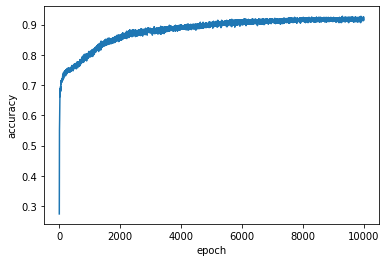

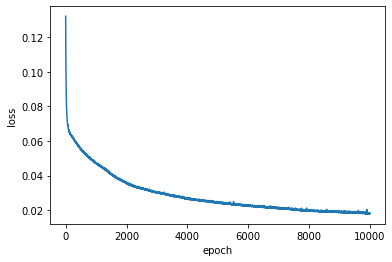

In [44]:
import matplotlib.pyplot as plt
loss=model.evaluate(X,y)
print('loss:', loss)

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
